In [1]:
#!pip install Pymcubes
#!pip install trimesh

In [2]:
import mcubes
import trimesh

In [3]:
import torch
import torch.nn as nn
import numpy as np

import os
import imageio
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from dataset import get_rays
from rendering import rendering
from model import Voxels, Nerf
from ml_helpers import training

In [4]:
device = 'cuda'
tn = 8.
tf = 12.
model = torch.load('model_nerf_30', weights_only=False).to(device)

In [5]:
N = 100
scale = 1.5

x = torch.linspace(-scale, scale, N)
y = torch.linspace(-scale, scale, N)
z = torch.linspace(-scale, scale, N)

x, y, z = torch.meshgrid((x, y, z))

c:\Users\super\Documents\GitHub\sequoia\.venv\Lib\site-packages\torch\functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4316.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
xyz = torch.cat((x.reshape(-1, 1),
                 y.reshape(-1, 1),
                 z.reshape(-1, 1)), dim=1)

In [7]:
with torch.no_grad():
    _, density = model.forward(xyz.to(device), torch.zeros_like(xyz).to(device))
    
density = density.cpu().numpy().reshape(N, N, N)

Density Min: 0.0
Density Max: 92.98983764648438
Density Mean: 1.1692019701004028
Density Median: 0.0


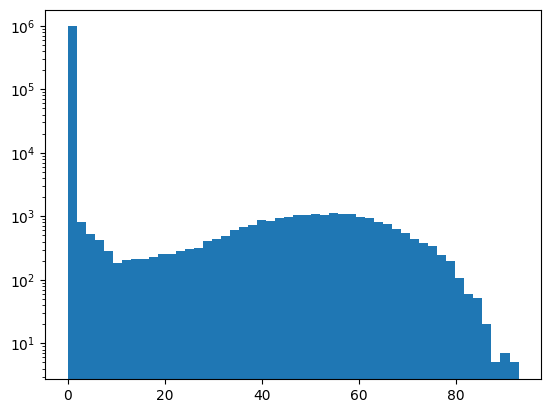

In [8]:
print(f"Density Min: {np.min(density)}")
print(f"Density Max: {np.max(density)}")
print(f"Density Mean: {np.mean(density)}")
print(f"Density Median: {np.median(density)}")
# Maybe even plot a histogram
import matplotlib.pyplot as plt
plt.hist(density.ravel(), bins=50)
plt.yscale('log')
plt.show()

In [9]:
vertices, triangles = mcubes.marching_cubes(density, 1 * np.mean(density))

In [10]:
mesh = trimesh.Trimesh(vertices / N, triangles)

In [11]:
mesh.show()